In [1]:
import pandas as pd
import numpy as np
import os
import csv
from csv import DictReader
from collections import Counter
import re 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys

In [2]:
csv_path =  "abc.csv"
Top_Hits_df = pd.read_csv(csv_path, sep= '\t', encoding='utf-8')
Top_Hits_df

,Ranking,Artist,Song Title,Year,Group / Solos
0,1,Percy Faith,Theme From “A Summer Place”,1960,Solo
1,2,Jim Reeves,He’ll Have To Go,1960,Solo
2,3,Everly Brothers,Cathy’s Clown,1960,Group
3,4,Johnny Preston,Running Bear,1960,Solo
4,5,Mark Dinning,Teen Angel,1960,Solo
5,6,Brenda Lee,I’m Sorry,1960,Solo
6,7,Elvis Presley,It’s Now Or Never,1960,Solo
7,8,Jimmy Jones,Handy Man,1960,Solo
8,9,Elvis Presley,Stuck On You,1960,Solo
9,10,Chubby Checker,The Twist,1960,Solo


In [3]:
artist_list = Top_Hits_df.Artist
artist_list.sort_values(ascending=True)

537                       Justin Timberlake
434                            3 Doors Down
430                                 50 Cent
457                    50 Cent feat. Olivia
188                        A Taste Of Honey
259                                    A-Ha
437                                 Aaliyah
340                             Ace Of Base
348                             Ace Of Base
349                             Ace Of Base
510                                   Adele
566                                   Adele
477                                    Akon
178                              Alan O’Day
411                             Alicia Keys
482                             Alicia Keys
442                             Alicia Keys
341                               All-4-One
319                               Amy Grant
180                               Andy Gibb
171                               Andy Gibb
187                               Andy Gibb
299                             

In [4]:
num_artists = 0
temp = ""
for i in artist_list:
    if i != temp:
        num_artists += 1
        temp = i
#     print(i)
print(num_artists)
unique_artists = Top_Hits_df.Artist.unique()
percent = unique_artists.size / num_artists

567


In [5]:
percent

0.781305114638448

In [6]:
labels = ["One Hit Wonders", "Repeat Artists"]

# The values of each section of the pie chart
sizes = [num_artists - unique_artists.size, unique_artists.size]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightgreen"]

# # Tells matplotlib to seperate the "Python" section from the others
# explode = (0.1, 0)

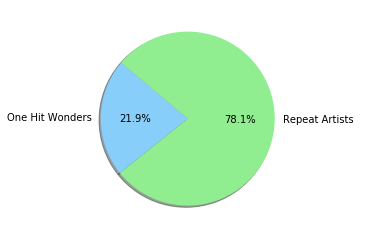

In [7]:
plt.axis("equal")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("OneHitWondersPie.png")

In [8]:
Songs = Top_Hits_df['Song Title'].tolist()

print(Songs)

['Theme From “A Summer Place”', 'He’ll Have To Go', 'Cathy’s Clown', 'Running Bear', 'Teen Angel', 'I’m Sorry', 'It’s Now Or Never', 'Handy Man', 'Stuck On You', 'The Twist', 'Tossin’ And Turnin’', 'I Fall To Pieces', 'Michael', 'Cryin’', 'Runaway', 'My True Story', 'Pony Time', 'Wheels', 'Raindrops', 'Wooden Heart (Muss I Denn)', 'Stranger On The Shore', 'I Can’t Stop Loving You', 'Mashed Potato Time', 'Roses Are Red', 'The Stripper', 'Johnny Angel', 'The Loco-Motion', 'Let Me In', 'The Twist', 'Soldier Boy', 'Sugar Shack', 'Surfin’ U.S.A.', 'The End Of The World', 'Rhythm Of The Rain', 'He’s So Fine', 'Blue Velvet', 'Hey Paula', 'Fingertips II', 'Washington Square', 'It’s All Right', 'I Want To Hold Your Hand', 'She Loves You', 'Hello, Dolly!', 'Oh, Pretty Woman', 'I Get Around', 'Everybody Loves Somebody', 'My Guy', 'We’ll Sing In The Sunshine', 'Last Kiss', 'Where Did Our Love Go', 'Wooly Bully', 'I Can’t Help Myself (Sugar Pie Honey Bunch)', '(I Can’t Get No) Satisfaction', 'You W

In [9]:
Song_Title = Top_Hits_df['Song Title']
Song_Title
Title = len(Song_Title)

In [10]:
String = ' '.join(Top_Hits_df['Song Title'].tolist())
String

'Theme From “A Summer Place” He’ll Have To Go Cathy’s Clown Running Bear Teen Angel I’m Sorry It’s Now Or Never Handy Man Stuck On You The Twist Tossin’ And Turnin’ I Fall To Pieces Michael Cryin’ Runaway My True Story Pony Time Wheels Raindrops Wooden Heart (Muss I Denn) Stranger On The Shore I Can’t Stop Loving You Mashed Potato Time Roses Are Red The Stripper Johnny Angel The Loco-Motion Let Me In The Twist Soldier Boy Sugar Shack Surfin’ U.S.A. The End Of The World Rhythm Of The Rain He’s So Fine Blue Velvet Hey Paula Fingertips II Washington Square It’s All Right I Want To Hold Your Hand She Loves You Hello, Dolly! Oh, Pretty Woman I Get Around Everybody Loves Somebody My Guy We’ll Sing In The Sunshine Last Kiss Where Did Our Love Go Wooly Bully I Can’t Help Myself (Sugar Pie Honey Bunch) (I Can’t Get No) Satisfaction You Were On My Mind You’ve Lost That Lovin’ Feelin’ Downtown Help! Can’t You Hear My Heartbeat Crying In The Chapel My Girl The Ballad Of The Green Berets Cherish (Y

In [11]:
She = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("She"), String))
Queen = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Queen"), String))   
Woman = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Woman"), String))
Women = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Women"), String))
Gal = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Gal"), String))
Girl = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Girl"), String))
Girls = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Girls"), String))
Gurls = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Gurls"), String))
Chick = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Chick"), String))
Lady = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Lady"), String))
Ladies = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Ladies"), String))
Sister = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Sister"), String))
Wife = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Wife"), String))
Daughter = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Daughter"), String))

Female_Sum = (She + Queen + Woman + Women + Gal + Girl + Gurls + Chick + Lady + Ladies + Sister + Wife + Daughter)
Female_Sum

19

In [12]:
He = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("He"), String))
His = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("His"), String))   
Man = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Man"), String))
Men = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Men"), String))
Boy = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Boy"), String))
Boys = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Boys"), String))
Guy = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Guy"), String))
Gentlemen = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Gentlemen"), String))
Gentleman = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Gentleman"), String))
King = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("King"), String))
Brother = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Brother"), String))
Father = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Father"), String))
Son = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("Son"), String))

Male_Sum = (He + His + Man + Men + Boy + Boys + Guy + Gentleman + Gentleman + King + Brother + Father + Son)
Male_Sum

14

In [13]:
Male_P = Male_Sum / Title * 100
Female_P = Female_Sum / Title * 100
All_P = Title / Title * 100

In [14]:
Gender_df = pd.DataFrame({
    "Song Titles":["All Songs", "Male Songs", "Female Songs"], 
    "Total Number":[Title, Male_Sum, Female_Sum], 
    "Percent of Songs": [All_P, Male_P, Female_P]})

Gender_df["Percent of Songs"] = Gender_df["Percent of Songs"].map("{:.2f}%".format)

Gender_Title = Gender_df[["Song Titles", "Total Number", "Percent of Songs"]]

Gender_Title

,Song Titles,Total Number,Percent of Songs
0,All Songs,580,100.00%
1,Male Songs,14,2.41%
2,Female Songs,19,3.28%


In [15]:
GT = Gender_Title.to_csv('Gender_Title.csv', index=False)


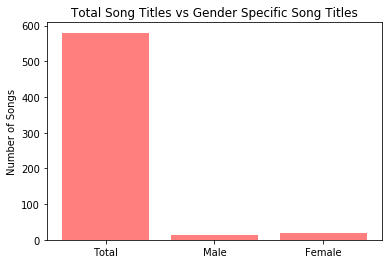

In [16]:
Titles = ('Total', 'Male', 'Female')
y_pos = np.arange(len(Titles))
Sums = [Title, Male_Sum, Female_Sum]
 
plt.bar(y_pos, Sums, align='center', alpha=0.5, color="red")
plt.xticks(y_pos, Titles)
plt.ylabel('Number of Songs')
plt.title('Total Song Titles vs Gender Specific Song Titles')


plt.savefig("Gender.png")    
plt.show()


NameError: name 'rects' is not defined

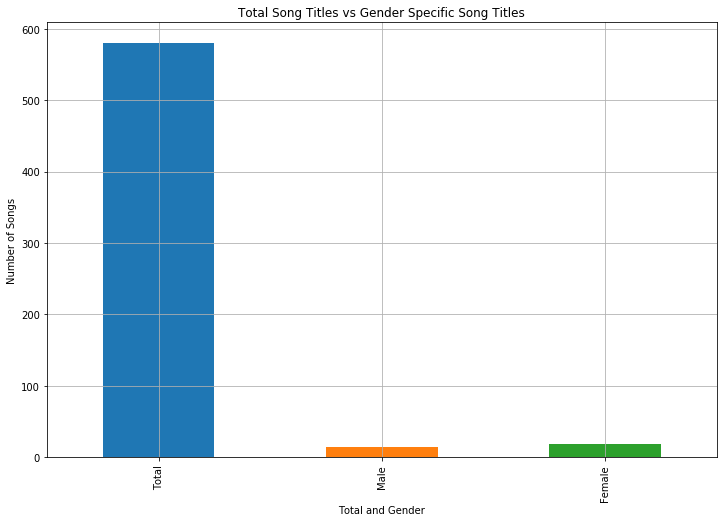

In [17]:
Titles = ('Total', 'Male', 'Female')
y_pos = np.arange(len(Titles))
x_labels = [Title, Male_Sum, Female_Sum]
Sums_series = pd.Series.from_array(Sums)

plt.figure(figsize=(12, 8))
ax = Sums_series.plot(kind='bar')
ax.set_title('Total Song Titles vs Gender Specific Song Titles')
ax.set_xlabel("Total and Gender")
ax.set_ylabel("Number of Songs")
ax.set_xticklabels(Titles)
plt.grid()

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5 
    va = 'bottom'
    label = "{:.0f}".format(y_value)

    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)                      

plt.savefig("GenderBar.png")    
plt.show()    

In [18]:
# Count Summary to give the total Solo hits and total Group hits (1960 -2017).
count_summary=Top_Hits_df["Group / Solos"].value_counts()
count_summary

Solo     338
Group    242
Name: Group / Solos, dtype: int64

Solo Count :338
Group Count:242
Total Count :580
58.27586206896552
41.724137931034484


<function matplotlib.pyplot.show>

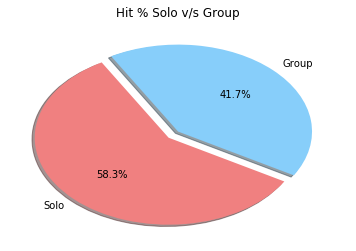

In [19]:
# creating seperate variables to get the count and %.
Top_Hits_df["Group / Solos"].nunique()
solo= Top_Hits_df.loc[Top_Hits_df["Group / Solos"]=="Solo"]
solo_tcount=len(solo)
print("Solo Count :" + str(solo_tcount))
group= Top_Hits_df.loc[Top_Hits_df["Group / Solos"]=="Group"]
group_tcount=len(group)
print("Group Count:" + str(group_tcount))
total_count =solo_tcount + group_tcount
print("Total Count :" + str(total_count))
per_solo = solo_tcount/total_count * 100
print(per_solo)
per_group=group_tcount/total_count * 100
print(per_group)
new = pd.DataFrame

# creating a pie chart, usinf the variables created earlier.
labels = ["Solo", "Group"]
sizes = [per_solo, per_group]
colors =["lightcoral", "lightskyblue"]
explode = [0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors= colors, autopct="%1.1f%%", shadow= True, startangle =120)
plt.title("Hit % Solo v/s Group")
plt.show

In [20]:
# Further analysis of data to show decadewise trend.
bins = [1959, 1969, 1979, 1989, 1999, 2009, 2018]
group_names = [1960, 1970, 1980, 1990, 2000,2010]

In [21]:
# Performing some functions to know data better.
Top_Hits_df.dtypes
Top_Hits_df["Year"] = pd.to_numeric(Top_Hits_df["Year"])
Top_Hits_df.head()

,Ranking,Artist,Song Title,Year,Group / Solos
0,1,Percy Faith,Theme From “A Summer Place”,1960,Solo
1,2,Jim Reeves,He’ll Have To Go,1960,Solo
2,3,Everly Brothers,Cathy’s Clown,1960,Group
3,4,Johnny Preston,Running Bear,1960,Solo
4,5,Mark Dinning,Teen Angel,1960,Solo


In [22]:
Top_Hits_df["year_view"] = pd.cut(Top_Hits_df["Year"], bins, labels=group_names)
Top_Hits_df["year_view"].count()

# newfile.dtypes
# newfile["year_view"]= pd.to_numeric(newfile["year_view"])
# newfile.dtypes


580

[1960, 1970, 1980, 1990, 2000, 2010]
Categories (6, int64): [1960 < 1970 < 1980 < 1990 < 2000 < 2010]
[55, 43, 49, 44, 28, 23]
[45, 57, 51, 56, 72, 57]


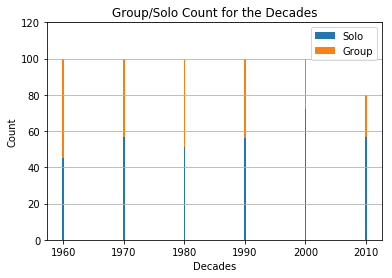

In [23]:
# Grouping data year wise and further bifurcation on Solos and Group.
year_view_grp_data= Top_Hits_df.groupby(["year_view"])

year_list = []
grp_count = []
solo_count = []
year_list = Top_Hits_df["year_view"].unique()
print(year_list)

#grp_count = [grp_data.get_group(year).groupby["Group / Solos"].get_group("Solo").size() for year in year_list]
#print(grp_data.get_group(2000).groupby["Group / Solos"].get_group("Solo").size())
# xa=grp_data["year_view"]
# ya=grp_data["Ranking"]

for year in year_list:
    working_df = year_view_grp_data.get_group(year)
    working_df = working_df.groupby("Group / Solos")
    grp_count.append(len(working_df.get_group("Group")["Year"]))
    solo_count.append(len(working_df.get_group("Solo")["Year"]))
    
print(grp_count)
print(solo_count)

width = [0.25]

fig1 = plt.bar(year_list, solo_count, width)
fig2 = plt.bar(year_list,grp_count, width, bottom=solo_count)
plt.xticks(year_list, year_list)
plt.title("Group/Solo Count for the Decades")
plt.legend( (fig1[0], fig2[0]), ('Solo', 'Group') )
plt.xlabel("Decades")
plt.ylabel("Count")
plt.grid(axis = 'y')
plt.ylim(0,120)
plt.show()
    